In [1]:
# import Denpendencies
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Import data
# Dictionary to hold file names and their paths
file_paths = {
    'amazon1': '../Resources/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Product1.csv',
    'amazon2': '../Resources/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Product2.csv'
}

# Dictionary to hold the loaded data
data_frames = {}

# Loop through the file_paths dictionary to load each file
for file_name, relative_path in file_paths.items():
    # Construct the absolute path
    file_path = os.path.abspath(relative_path)
    
    # Attempt to load the CSV file into a DataFrame
    try:
        data_frames[file_name] = pd.read_csv(file_path,low_memory=False)
        print(f"{file_name} data loaded successfully!")
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
    except Exception as e:
        print(f"An error occurred while loading {file_name}: {e}")


amazon1 data loaded successfully!
amazon2 data loaded successfully!


In [3]:
# Accessing data from amazon1
amazon_df1 = data_frames['amazon1']
amazon_df1

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,AVqkIdZiv8e3D1O-leaJ,2017-03-06T14:59:25Z,2017-09-04T11:19:31Z,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",B018Y224PY,Amazon,"Tablets,Fire Tablets,Electronics,iPad & Tablet...",Electronics,https://images-na.ssl-images-amazon.com/images...,"841667103150,0841667103150,firetabletwithalexa...",...,"2017-04-30T02:06:48.451Z,2017-06-07T08:20:48.408Z",True,NaN,0,5,http://reviews.bestbuy.com/3545/5025900/review...,This is a great tablet for the price. Amazon i...,Good product,litle,"https://www.barcodable.com/upc/841667103150,ht..."
4996,AVqkIdZiv8e3D1O-leaJ,2017-03-06T14:59:25Z,2017-09-04T11:19:31Z,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",B018Y224PY,Amazon,"Tablets,Fire Tablets,Electronics,iPad & Tablet...",Electronics,https://images-na.ssl-images-amazon.com/images...,"841667103150,0841667103150,firetabletwithalexa...",...,"2017-04-30T02:07:00.236Z,2017-06-07T08:20:55.199Z",True,NaN,1,5,http://reviews.bestbuy.com/3545/5025900/review...,This table

In [4]:
# Accessing data from amazon1
amazon_df2 = data_frames['amazon2']
amazon_df2

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28327,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5620410/review...,I got 2 of these for my 8 yr old twins. My 11 ...,Xmas gift,Mom2twinsplus1,http://reviews.bestbuy.com/3545/5620410/review...
28328,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,NaN,True,NaN,0.0,4,http://reviews.bestbuy.com/3545/5620410/review

In [5]:
# Concatenate vertically
complete_data = pd.concat([amazon_df1, amazon_df2])
complete_data.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,reviews.didPurchase
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,False,NaN,0.0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...,NaN
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...,NaN
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,True,NaN,0.0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...,NaN
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,True,177283626.0,3.0,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...,NaN
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,True,NaN,0.0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...,NaN


In [6]:
# find the shape of dataframe
print(complete_data.shape)

(33332, 25)


In [7]:
# Finding null values in the DataFrame
null_values = complete_data.isnull().sum()

print("Null values in each column:")
print(null_values)

Null values in each column:
id                         0
dateAdded                  0
dateUpdated                0
name                       0
asins                      0
brand                      0
categories                 0
primaryCategories          0
imageURLs                  0
keys                       0
manufacturer               0
manufacturerNumber         0
reviews.date               0
reviews.dateAdded      32280
reviews.dateSeen           0
reviews.doRecommend    12246
reviews.id             33262
reviews.numHelpful     12217
reviews.rating             0
reviews.sourceURLs         0
reviews.text               0
reviews.title             13
reviews.username           6
sourceURLs                 0
reviews.didPurchase    33323
dtype: int64


There are 33332 rows and 25 columns in complete_data. reviews.dateAdded contains 32280, reviews.id contains 33262 and reviews.didPurchase contains 33323 these columns has null values close to total number of rows so the purpose of organizing and cleaning data these columns can be dropped.

In [8]:
# Delete the empty columns
cleaned_data = complete_data.drop(columns=['id','reviews.dateAdded','reviews.id','reviews.didPurchase'])

In [9]:
# Function to convert datetime string to datetime object
def convert_to_datetime(datetime_str):
    if isinstance(datetime_str, str):
        try:
            return datetime.strptime(datetime_str, '%Y-%m-%dT%H:%M:%SZ')
        except ValueError:
            return datetime_str  # Return the original value if conversion fails
    else:
        return datetime_str  # Return the datetime object unchanged

# Iterate over each column in the DataFrame
for column in cleaned_data.columns:
    # Apply the conversion function to each element in the column
    cleaned_data[column] = cleaned_data[column].apply(convert_to_datetime)

# Print the DataFrame after conversion
print(cleaned_data)

                dateAdded         dateUpdated  \
0     2017-03-03 16:56:05 2018-10-25 16:36:31   
1     2017-03-03 16:56:05 2018-10-25 16:36:31   
2     2017-03-03 16:56:05 2018-10-25 16:36:31   
3     2017-03-03 16:56:05 2018-10-25 16:36:31   
4     2017-03-03 16:56:05 2018-10-25 16:36:31   
...                   ...                 ...   
28327 2017-03-06 14:59:43 2019-02-23 02:49:38   
28328 2017-03-06 14:59:43 2019-02-23 02:49:38   
28329 2017-03-06 14:59:43 2019-02-23 02:49:38   
28330 2017-03-06 14:59:43 2019-02-23 02:49:38   
28331 2017-03-06 14:59:43 2019-02-23 02:49:38   

                                                    name       asins   brand  \
0      Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
1      Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
2      Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
3      Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
4      Amaz

In [10]:
# Number of columns in data frame after deleting empty columns
print(cleaned_data.shape)

(33332, 21)


In [11]:
# Checking data type of columns in dataframe
complete_data.dtypes

id                      object
dateAdded               object
dateUpdated             object
name                    object
asins                   object
brand                   object
categories              object
primaryCategories       object
imageURLs               object
keys                    object
manufacturer            object
manufacturerNumber      object
reviews.date            object
reviews.dateAdded       object
reviews.dateSeen        object
reviews.doRecommend     object
reviews.id             float64
reviews.numHelpful     float64
reviews.rating           int64
reviews.sourceURLs      object
reviews.text            object
reviews.title           object
reviews.username        object
sourceURLs              object
reviews.didPurchase     object
dtype: object

In [12]:
# Identify columns with missing values
categorical_columns_with_missing = cleaned_data.select_dtypes(include='object').columns[cleaned_data.select_dtypes(include='object').isnull().any()]
numerical_columns_with_missing = cleaned_data.select_dtypes(include=['int64', 'float64']).columns[cleaned_data.select_dtypes(include=['int64', 'float64']).isnull().any(axis=0)]

In [13]:
# Create a copy of the DataFrame for preprocessing
df_filled_unsupervised = cleaned_data.copy()

In [14]:
# Fill missing numerical values with 0
for col in numerical_columns_with_missing:
    df_filled_unsupervised[col] = df_filled_unsupervised[col].fillna(0)

In [15]:
# Convert datetime columns to Unix timestamps
datetime_columns = df_filled_unsupervised.select_dtypes(include='datetime64').columns
for col in datetime_columns:
    df_filled_unsupervised[col] = df_filled_unsupervised[col].astype(np.int64) // 10**9  # Convert to Unix timestamp

In [16]:
# Finding null values in the DataFrame
null_values = df_filled_unsupervised.isnull().sum()

print("Null values in each column:")
print(null_values)

Null values in each column:
dateAdded                  0
dateUpdated                0
name                       0
asins                      0
brand                      0
categories                 0
primaryCategories          0
imageURLs                  0
keys                       0
manufacturer               0
manufacturerNumber         0
reviews.date               0
reviews.dateSeen           0
reviews.doRecommend    12246
reviews.numHelpful         0
reviews.rating             0
reviews.sourceURLs         0
reviews.text               0
reviews.title             13
reviews.username           6
sourceURLs                 0
dtype: int64


In [17]:
# Record the start time
start_time = time.time()

# Initialize n_clusters for KMeans
n_clusters = 5

# Prepare DataFrame for clustering (excluding categorical columns with missing values and 'reviews.text')
df_clustering = df_filled_unsupervised.drop(columns=categorical_columns_with_missing)
df_clustering = df_clustering.drop(columns=['reviews.text'])  # Remove 'reviews.text' from clustering

# Scale only numerical columns
numerical_columns = df_clustering.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df_clustering_scaled = scaler.fit_transform(df_clustering[numerical_columns])

# Check the minimum of the number of samples and features
min_samples_features = min(df_clustering_scaled.shape)

# Reduce the number of components if necessary
n_components = min(100, min_samples_features - 1)

# Reduce dimensionality using PCA
pca = PCA(n_components=n_components)  # Adjust the number of components as needed
df_clustering_pca = pca.fit_transform(df_clustering_scaled)

# Perform clustering on PCA-transformed data
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_filled_unsupervised['cluster'] = kmeans.fit_predict(df_clustering_pca)

# Fill missing categorical values based on clusters
for col in categorical_columns_with_missing:
    print(f"Filling missing values for {col} using clustering-based approach")
    # Count the number of missing values before filling
    missing_before = df_filled_unsupervised[col].isnull().sum()

    # Loop over each cluster to fill missing values
    for cluster in range(n_clusters):
        cluster_df = df_filled_unsupervised.loc[df_filled_unsupervised['cluster'] == cluster, col]

        if not cluster_df.empty:
            mode_value = cluster_df.mode().iloc[0] if not cluster_df.mode().empty else df_filled_unsupervised[col].mode()[0] if df_filled_unsupervised[col].mode().size > 0 else "Missing"
            df_filled_unsupervised.loc[(df_filled_unsupervised['cluster'] == cluster) & (df_filled_unsupervised[col].isnull()), col] = mode_value

    # Count the number of missing values after filling and calculate the filled amount
    missing_after = df_filled_unsupervised[col].isnull().sum()
    total_filled = missing_before - missing_after
    print(f"Filled {total_filled} missing values for {col}")

# removing the cluster column 
df_filled_unsupervised.drop(columns=['cluster'], inplace=True)

# Verify no missing values are left
print("\nNumber of missing values after filling:", df_filled_unsupervised.isnull().sum().sum())

# Record the end time
end_time = time.time()

# Calculate the time taken
time_taken = end_time - start_time

# Convert to minutes and seconds
minutes = int(time_taken // 60)
seconds = int(time_taken % 60)

print(f"Time taken to run the code: {minutes} minutes and {seconds} seconds")


Filling missing values for reviews.doRecommend using clustering-based approach
Filled 12246 missing values for reviews.doRecommend
Filling missing values for reviews.title using clustering-based approach
Filled 13 missing values for reviews.title
Filling missing values for reviews.username using clustering-based approach
Filled 6 missing values for reviews.username

Number of missing values after filling: 0
Time taken to run the code: 0 minutes and 1 seconds


In [18]:
# Create a new column 'sentiment' to store the sentiment scores
df_filled_unsupervised['sentiment'] = df_filled_unsupervised['reviews.text'].apply(lambda text: TextBlob(text).sentiment.polarity)

# Convert the continuous sentiment scores to categorical labels (e.g., positive, neutral, negative)
df_filled_unsupervised['sentiment_label'] = pd.cut(df_filled_unsupervised['sentiment'], bins=3, labels=['negative', 'neutral', 'positive'])

# Display the DataFrame with sentiment scores and labels
print(df_filled_unsupervised[['reviews.text', 'sentiment', 'sentiment_label']])

                                            reviews.text  sentiment  \
0      I thought it would be as big as small paper bu...  -0.108974   
1      This kindle is light and easy to use especiall...   0.277778   
2      Didnt know how much i'd use a kindle so went f...   0.165625   
3      I am 100 happy with my purchase. I caught it o...   0.240497   
4      Solid entry level Kindle. Great for kids. Gift...   0.468750   
...                                                  ...        ...   
28327  I got 2 of these for my 8 yr old twins. My 11 ...   0.425000   
28328  I bought this for my niece for a Christmas gif...   0.300000   
28329  Very nice for light internet browsing, keeping...   0.420000   
28330  This Tablet does absolutely everything I want!...   0.272917   
28331  At ninety dollars, the expectionations are low...   0.417755   

      sentiment_label  
0             neutral  
1             neutral  
2             neutral  
3             neutral  
4            positive  
...

For each text, TextBlob computes a polarity score between -1 and 1, where negative values indicate negative sentiment, positive values indicate positive sentiment, and values around 0 indicate neutral sentiment.

pd.cut() divides the continuous polarity scores into three bins using bins=3, and assigns the labels 'negative', 'neutral', and 'positive' to these bins.

In [19]:
# Display complete dataframe
sentiment_df = df_filled_unsupervised
sentiment_df

,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,...,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,sentiment,sentiment_label
0,1488560165,1540485391,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,...,False,0.0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...,-0.108974,neutral
1,1488560165,1540485391,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,...,True,0.0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...,0.277778,neutral
2,1488560165,1540485391,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,...,True,0.0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...,0.165625,neutral
3,1488560165,1540485391,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,...,True,3.0,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...,0.240497,neutral
4,1488560165,1540485391,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,...,True,0.0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...,0.468750,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28327,1488812383,1550890178,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",Amazon,...,True,0.0,5,http://reviews.bestbuy.com/3545/5620410/review...,I got 2 of these for my 8 yr old twins. My 11 ...,Xmas gift,Mom2twinsplus1,http://reviews.bestbuy.com/3545/5620410/review...,0.425000,positive
28328,1488812383,1550890178,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",Amazon,...,True,0.0,4,http://reviews.bestbuy.com/3545/5620410/review...,I bought this for my niece for a Christmas gif...,yes it is a great tablet.,fireman21,http://reviews.bestbuy.com/3545/5620410/review...,0.300000,neutral
28329,1488812383,1550890178,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",Amazon,

In [20]:
# Convert Unix timestamps to datetime objects
sentiment_df['dateAdded'] = pd.to_datetime(sentiment_df['dateAdded'], unit='s')
sentiment_df['dateUpdated'] = pd.to_datetime(sentiment_df['dateUpdated'], unit='s')

# Extracting date and time components into separate columns
sentiment_df['dateAdded_date'] = sentiment_df['dateAdded'].dt.date
sentiment_df['dateAdded_time'] = sentiment_df['dateAdded'].dt.time
sentiment_df['dateUpdated_date'] = sentiment_df['dateUpdated'].dt.date
sentiment_df['dateUpdated_time'] = sentiment_df['dateUpdated'].dt.time

# Displaying the updated DataFrame
print(sentiment_df)

                dateAdded         dateUpdated  \
0     2017-03-03 16:56:05 2018-10-25 16:36:31   
1     2017-03-03 16:56:05 2018-10-25 16:36:31   
2     2017-03-03 16:56:05 2018-10-25 16:36:31   
3     2017-03-03 16:56:05 2018-10-25 16:36:31   
4     2017-03-03 16:56:05 2018-10-25 16:36:31   
...                   ...                 ...   
28327 2017-03-06 14:59:43 2019-02-23 02:49:38   
28328 2017-03-06 14:59:43 2019-02-23 02:49:38   
28329 2017-03-06 14:59:43 2019-02-23 02:49:38   
28330 2017-03-06 14:59:43 2019-02-23 02:49:38   
28331 2017-03-06 14:59:43 2019-02-23 02:49:38   

                                                    name       asins   brand  \
0      Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
1      Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
2      Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
3      Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
4      Amaz

In [21]:
# drop column dateAdded and dateUpdated
sentiment_df = sentiment_df.drop(columns=['dateAdded','dateUpdated'],axis=1)

In [22]:
#rename columns dateAdded_date to dateAdded dateUpdated_date to dateUpdated and dateAdded_time to timeAdded and timeUpdated respectively
sentiment_df = sentiment_df.rename(columns={'dateAdded_date':'dateAdded',
                                            'dateUpdated_date':'dateUpdated',
                                            'dateAdded_time':'timeAdded',
                                            'dateUpdated_time':'timeUpdated'})

In [23]:
# Print the updated DataFrame
sentiment_df.head()

,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,...,reviews.text,reviews.title,reviews.username,sourceURLs,sentiment,sentiment_label,dateAdded,timeAdded,dateUpdated,timeUpdated
0,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-09-03T00:00:00.000Z,...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...,-0.108974,neutral,2017-03-03,16:56:05,2018-10-25,16:36:31
1,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-06-06T00:00:00.000Z,...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...,0.277778,neutral,2017-03-03,16:56:05,2018-10-25,16:36:31
2,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2018-04-20T00:00:00.000Z,...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...,0.165625,neutral,2017-03-03,16:56:05,2018-10-25,16:36:31
3,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-11-02T17:33:31.000Z,...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...,0.240497,neutral,2017-03-03,16:56:05,2018-10-25,16:36:31
4,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2018-04-24T00:00:00.000Z,...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...,0.468750,positive,2017-03-03,16:56:05,2018-10-25,16:36:31


In [24]:
# Count of Sentiments
sentiment_count  = df_filled_unsupervised['sentiment_label'].value_counts()
sentiment_count

sentiment_label
positive    17738
neutral     15328
negative      266
Name: count, dtype: int64

## Products Recommendations

### Using countVectorization

In [25]:


# Split data into features and target
X = df_filled_unsupervised['reviews.text']
y = df_filled_unsupervised['sentiment_label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# List of classifiers
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),  # Increase max_iter
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Dictionary to store accuracies and classification reports
accuracies = {}
reports = {}

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    # Train classifier
    clf.fit(X_train_vec, y_train)
    
    # Evaluate classifier
    y_pred = clf.predict(X_test_vec)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[clf_name] = accuracy
    print(f"{clf_name} Accuracy:", accuracy)
    
    # Generate classification report
    report = classification_report(y_test, y_pred)
    reports[clf_name] = report
    print(f"{clf_name} Classification Report:\n{report}\n")

# Choose the model with the best accuracy for prediction
best_model = max(accuracies, key=accuracies.get)
print(f"Best Model for Prediction: {best_model} (Accuracy: {accuracies[best_model]})")

# Use the best model to make recommendations
def recommend_items(user_review):
    user_vec = vectorizer.transform([user_review])
    sentiment = classifiers[best_model].predict(user_vec)[0]
    
    if sentiment == 'positive':
        # Recommend positive items
        positive_items = df_filled_unsupervised[df_filled_unsupervised['sentiment_label'] == 'positive']['name']
        return positive_items.sample(5).tolist()  # Return 5 random positive items
    else:
        # Recommend negative items
        negative_items = df_filled_unsupervised[df_filled_unsupervised['sentiment_label'] == 'negative']['name']
        return negative_items.sample(5).tolist()  # Return 5 random negative items


Naive Bayes Accuracy: 0.7871606419679016
Naive Bayes Classification Report:
              precision    recall  f1-score   support

    negative       0.50      0.02      0.04        55
     neutral       0.83      0.70      0.76      3123
    positive       0.76      0.88      0.82      3489

    accuracy                           0.79      6667
   macro avg       0.70      0.53      0.54      6667
weighted avg       0.79      0.79      0.78      6667


Logistic Regression Accuracy: 0.9416529173541323
Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       0.64      0.33      0.43        55
     neutral       0.93      0.94      0.94      3123
    positive       0.95      0.95      0.95      3489

    accuracy                           0.94      6667
   macro avg       0.84      0.74      0.77      6667
weighted avg       0.94      0.94      0.94      6667


SVM Accuracy: 0.9148042597870106
SVM Classification Report:
        

In [26]:
user_review = "I absolutely not loved this product!"
recommended_items = recommend_items(user_review)
print("Recommended Items:")
for item in recommended_items:
    print(item)

Recommended Items:
AmazonBasics AAA Performance Alkaline Batteries (36 Count)
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case
Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers
AmazonBasics AAA Performance Alkaline Batteries (36 Count)
AmazonBasics AAA Performance Alkaline Batteries (36 Count)


### Using TfidfVectorization

In [27]:
# Split data into features and target
X = df_filled_unsupervised['reviews.text']
y = df_filled_unsupervised['sentiment_label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text data using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# List of classifiers
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),  # Increase max_iter
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Dictionary to store accuracies and classification reports
accuracies = {}
reports = {}

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    # Train classifier
    clf.fit(X_train_vec, y_train)
    
    # Evaluate classifier
    y_pred = clf.predict(X_test_vec)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[clf_name] = accuracy
    print(f"{clf_name} Accuracy:", accuracy)
    
    # Generate classification report with zero_division parameter set to 1
    report = classification_report(y_test, y_pred, zero_division=1)
    reports[clf_name] = report
    print(f"{clf_name} Classification Report:\n{report}\n")

# Choose the model with the best accuracy for prediction
best_model = max(accuracies, key=accuracies.get)
print(f"Best Model for Prediction: {best_model} (Accuracy: {accuracies[best_model]})")

# Use the best model to make recommendations
def recommend_items(user_review):
    user_vec = vectorizer.transform([user_review])
    sentiment = classifiers[best_model].predict(user_vec)[0]
    
    if sentiment == 'positive':
        # Recommend positive items
        positive_items = df_filled_unsupervised[df_filled_unsupervised['sentiment_label'] == 'positive']['name']
        return positive_items.sample(5).tolist()  # Return 5 random positive items
    else:
        # Recommend negative items
        negative_items = df_filled_unsupervised[df_filled_unsupervised['sentiment_label'] == 'negative']['name']
        return negative_items.sample(5).tolist()  # Return 5 random negative items

# Example usage: recommend items based on a user review
user_review = "This product is amazing!"
recommended_items = recommend_items(user_review)
print("Recommended Items:", recommended_items)

Naive Bayes Accuracy: 0.8098095095245238
Naive Bayes Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.00      0.00        55
     neutral       0.84      0.74      0.79      3123
    positive       0.79      0.88      0.83      3489

    accuracy                           0.81      6667
   macro avg       0.88      0.54      0.54      6667
weighted avg       0.81      0.81      0.81      6667


Logistic Regression Accuracy: 0.9229038548072597
Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.00      0.00        55
     neutral       0.90      0.94      0.92      3123
    positive       0.94      0.93      0.93      3489

    accuracy                           0.92      6667
   macro avg       0.95      0.62      0.62      6667
weighted avg       0.92      0.92      0.92      6667


SVM Accuracy: 0.9536523173841308
SVM Classification Report:
        

In [28]:
user_review = "I absolutely loved this product!"
recommended_items = recommend_items(user_review)
print("Recommended Items:")
for item in recommended_items:
    print(item)

Recommended Items:
Fire Tablet with Alexa, 7 Display, 16 GB, Magenta - with Special Offers
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black
AmazonBasics AAA Performance Alkaline Batteries (36 Count)
Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black


# Sentiment Analysis

In [29]:
# Copy clean Data for analysis
data = df_filled_unsupervised.copy()

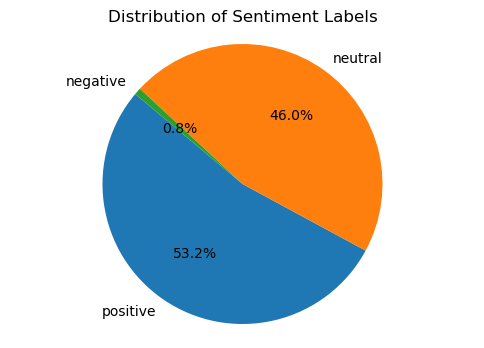

In [30]:
# Count the occurrences of each sentiment label
sentiment_counts = df_filled_unsupervised['sentiment_label'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 4))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiment Labels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [31]:
# Find the number of each product
product_count = data['name'].value_counts().reset_index()
product_count.columns = ['name', 'count']

# Print top 10 products with their count
print("Top 10 Products with Count:")
print(product_count.head(10))

Top 10 Products with Count:
                                                name  count
0  AmazonBasics AAA Performance Alkaline Batterie...   8343
1  AmazonBasics AA Performance Alkaline Batteries...   3728
2  Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...   2443
3  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   2370
4  Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...   1986
5  Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...   1676
6  Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...   1429
7  Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...   1395
8  Fire Tablet with Alexa, 7 Display, 16 GB, Blue...    987
9  All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...    883


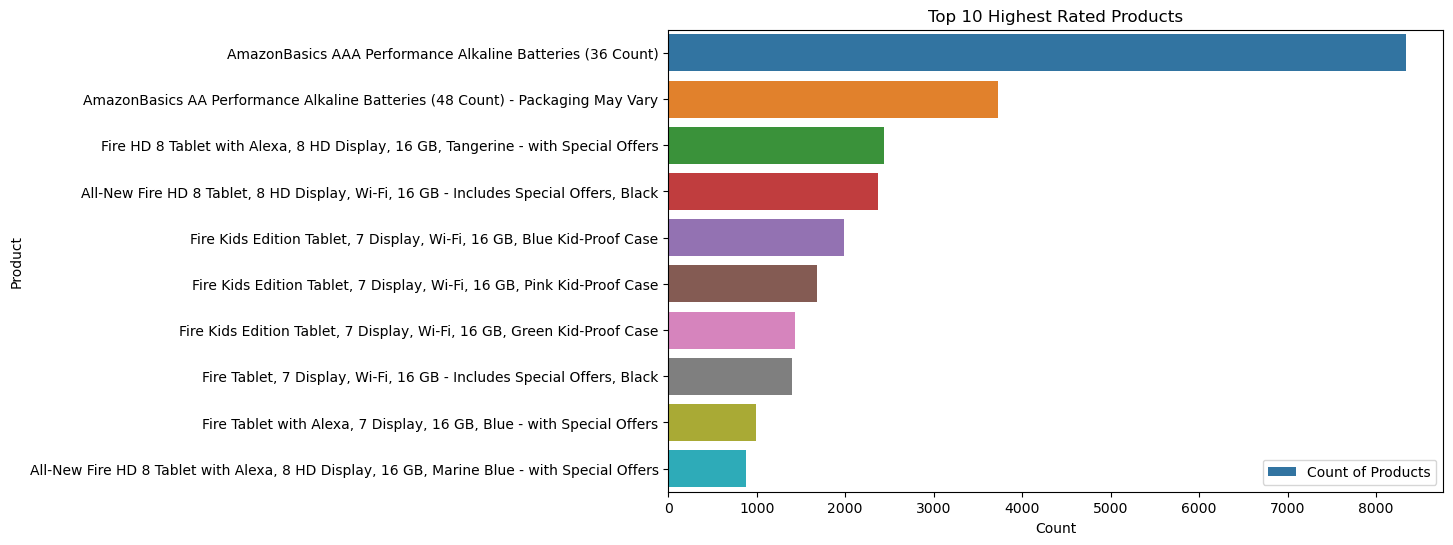

In [32]:
# Select top 10 highest products
top_10_highest_products = product_count.head(10)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='name', data=top_10_highest_products, label='Count of Products')
plt.xlabel('Count')
plt.ylabel('Product')
plt.title('Top 10 Highest Rated Products')
plt.legend()
plt.show()

In [33]:
# Find the number of ratings 
ratings_count = data['reviews.rating'].value_counts().reset_index()
ratings_count.columns = ['Ratings', 'count']

# Print count of ratings
print("Count of Ratings:")
print(ratings_count.head())

Count of Ratings:
   Ratings  count
0        5  23375
1        4   6856
2        3   1403
3        1   1028
4        2    670


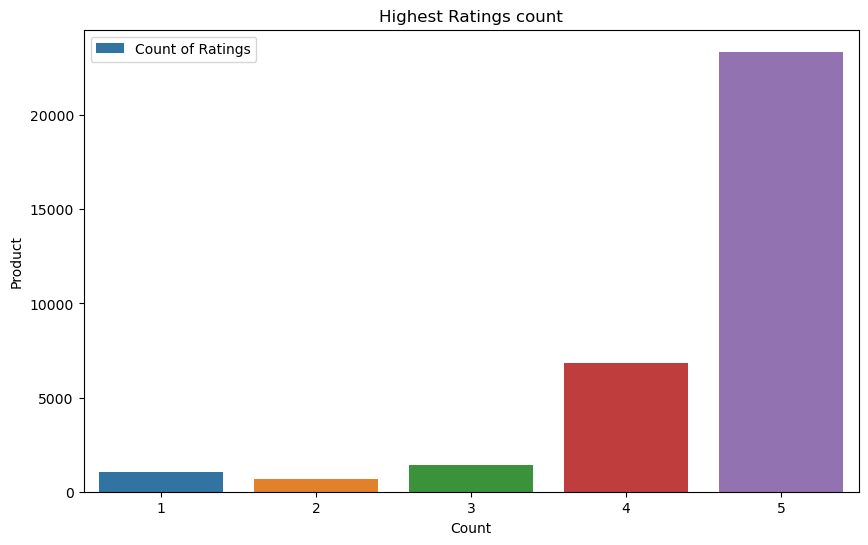

In [34]:
# Select top 10 highest products
products_ratings = ratings_count.head()

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Ratings', y='count', data=products_ratings, label='Count of Ratings')
plt.xlabel('Count')
plt.ylabel('Product')
plt.title('Highest Ratings count')
plt.legend()
plt.show()

In [35]:
# Count the sentiment for each product
sentiment_counts = data.groupby(['name', 'sentiment_label']).size().reset_index(name='count')

# Sort by count in descending order
sentiment_counts = sentiment_counts.sort_values(by='count', ascending=False)

# Print top 10 products with their sentiment counts
print("Sentiment Counts for Each Product:")
print(sentiment_counts.head(10))

Sentiment Counts for Each Product:
                                                  name sentiment_label  count
118  AmazonBasics AAA Performance Alkaline Batterie...         neutral   4169
119  AmazonBasics AAA Performance Alkaline Batterie...        positive   4075
116  AmazonBasics AA Performance Alkaline Batteries...        positive   1860
115  AmazonBasics AA Performance Alkaline Batteries...         neutral   1818
176  Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...        positive   1425
17   All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...        positive   1397
185  Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...        positive   1040
175  Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...         neutral   1006
16   All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...         neutral    963
184  Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...         neutral    930


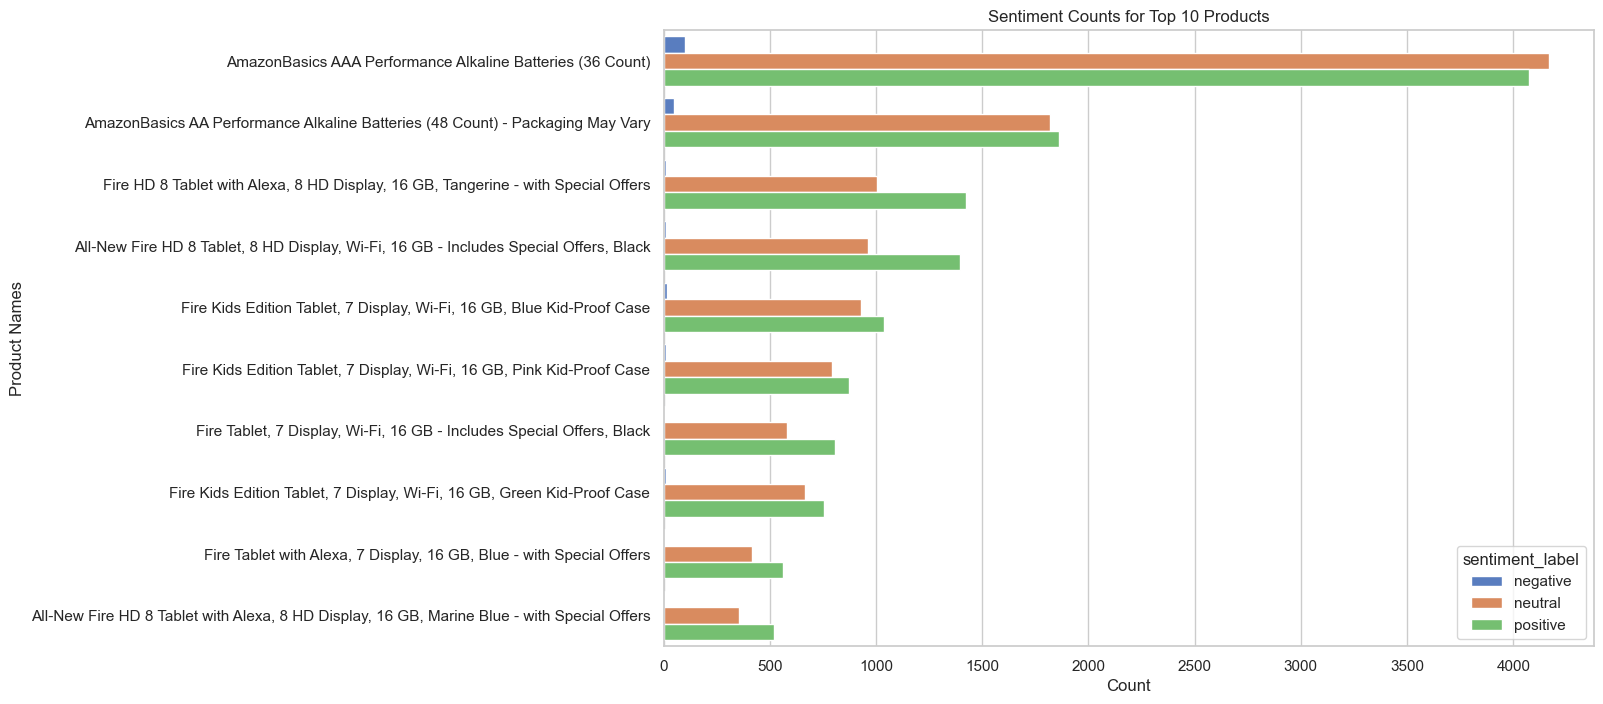

In [36]:
# Filter to include only the top 10 products based on count
top_10_products = sentiment_counts.groupby('name')['count'].sum().nlargest(10).index
sentiment_counts_top_10 = sentiment_counts[sentiment_counts['name'].isin(top_10_products)]

# Set the seaborn style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=sentiment_counts_top_10, x='count', y='name', hue='sentiment_label', palette='muted')

# Set labels and title
plt.xlabel('Count')
plt.ylabel('Product Names')
plt.title('Sentiment Counts for Top 10 Products')

# Show the plot
plt.show()

In [37]:
# Count the sentiment for each primary category
sentiment_counts = data.groupby(['primaryCategories', 'sentiment_label']).size().reset_index(name='count')

# Sort by count in descending order
sentiment_counts = sentiment_counts.sort_values(by='count', ascending=False)

# Print top 10 categories with their sentiment counts
print("Sentiment Counts for Category:")
print(sentiment_counts.head(10))

Sentiment Counts for Category:
              primaryCategories sentiment_label  count
5                   Electronics        positive   9629
4                   Electronics         neutral   7543
16              Health & Beauty         neutral   5987
17              Health & Beauty        positive   5935
29     Toys & Games,Electronics        positive    872
11         Electronics,Hardware        positive    860
28     Toys & Games,Electronics         neutral    793
10         Electronics,Hardware         neutral    572
26  Office Supplies,Electronics        positive    336
25  Office Supplies,Electronics         neutral    311


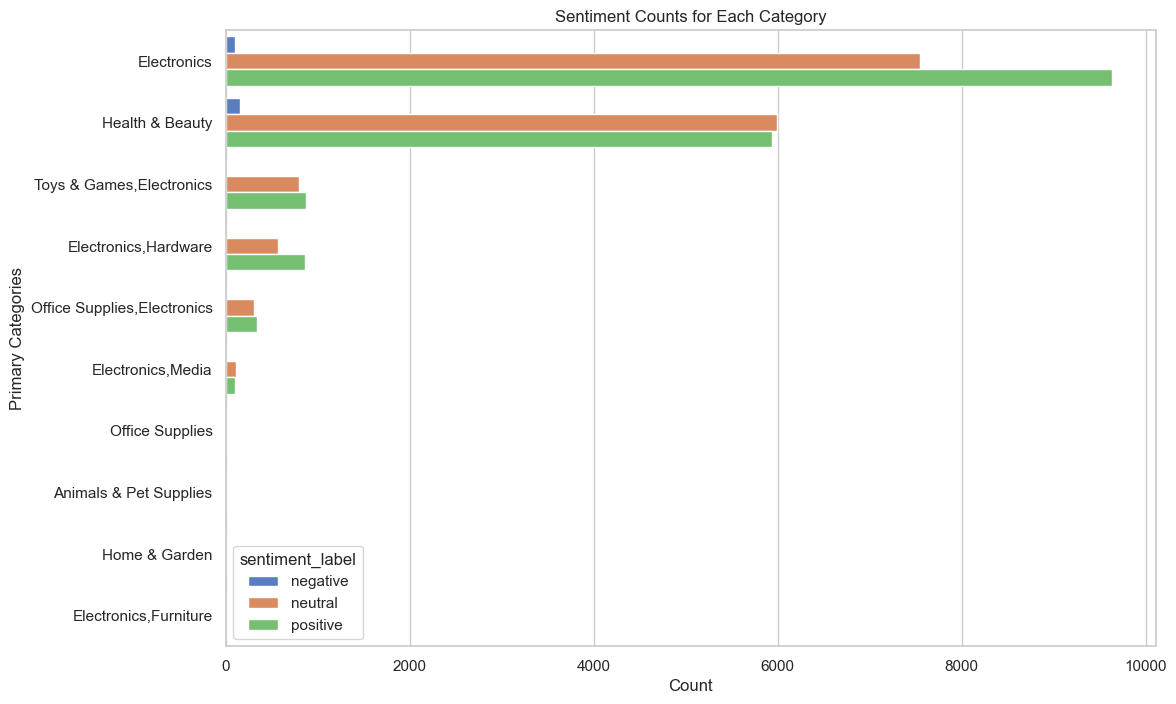

In [38]:
# Set the seaborn style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=sentiment_counts, x='count', y='primaryCategories', hue='sentiment_label', palette='muted')

# Set labels and title
plt.xlabel('Count')
plt.ylabel('Primary Categories')
plt.title('Sentiment Counts for Each Category')

# Show the plot
plt.show()

# Models Analysis

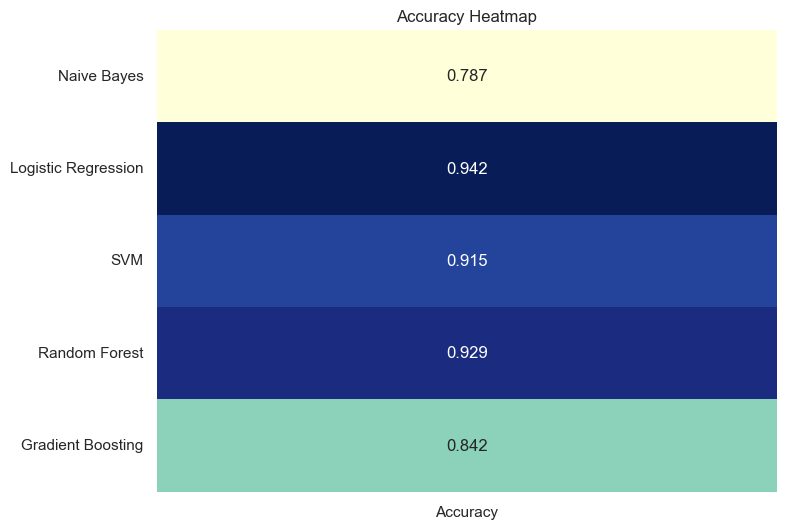

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define accuracy scores
accuracy_scores = {
    "Naive Bayes": 0.7871606419679016,
    "Logistic Regression": 0.9416529173541323,
    "SVM": 0.9148042597870106,
    "Random Forest": 0.9287535623218839,
    "Gradient Boosting": 0.8420578971051448
}

# Create accuracy heatmap
plt.figure(figsize=(8, 6))
accuracy_heatmap = sns.heatmap([[accuracy_scores[model]] for model in accuracy_scores.keys()], annot=True, cmap="YlGnBu", fmt=".3f", cbar=False)
accuracy_heatmap.set_title('Accuracy Heatmap')
accuracy_heatmap.set_yticklabels(accuracy_scores.keys(), rotation=0)
accuracy_heatmap.set_xticklabels(['Accuracy'])
plt.show()


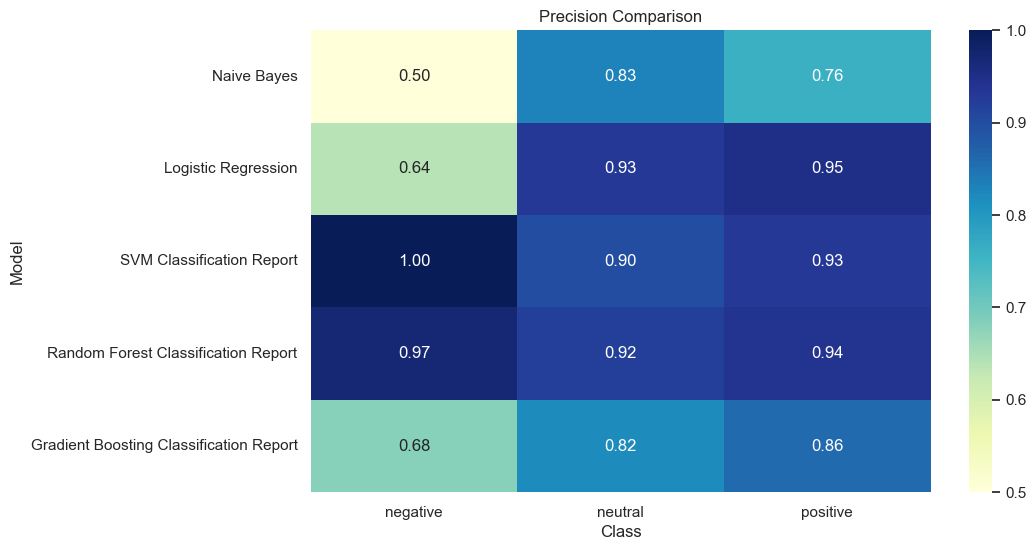

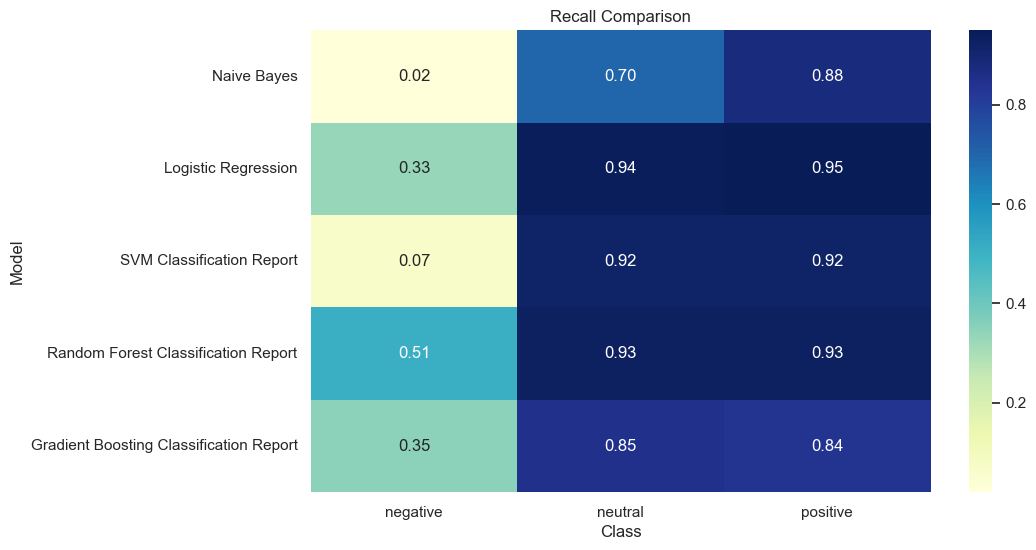

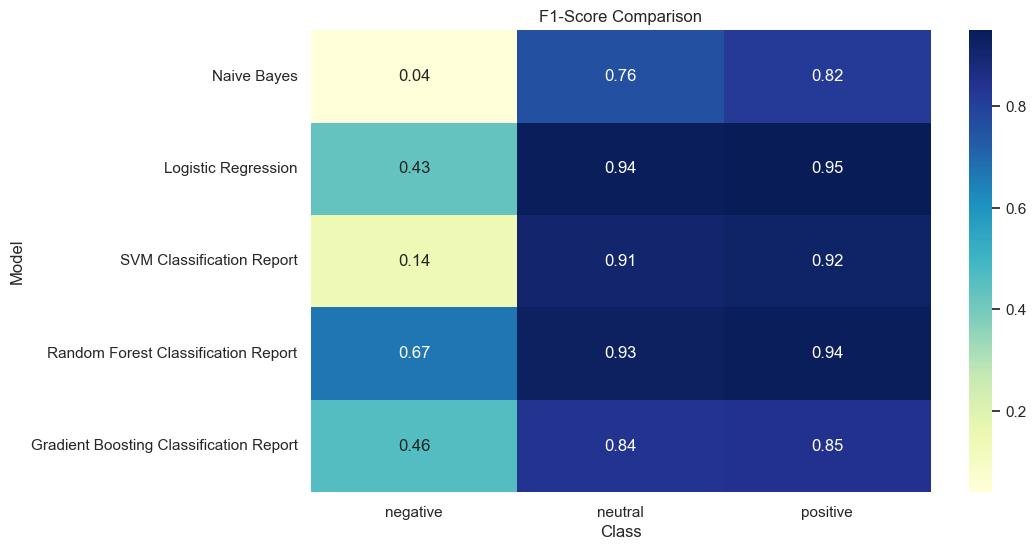

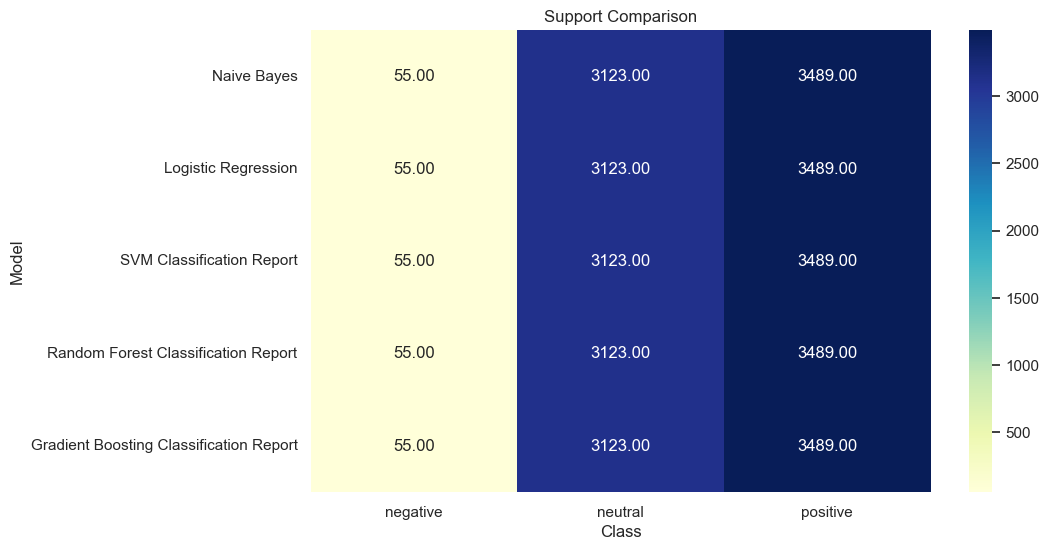

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd

# Define classification reports
classification_reports = {
    "Naive Bayes": """
              precision    recall  f1-score   support

    negative       0.50      0.02      0.04        55
     neutral       0.83      0.70      0.76      3123
    positive       0.76      0.88      0.82      3489

    accuracy                           0.79      6667
   macro avg       0.70      0.53      0.54      6667
weighted avg       0.79      0.79      0.78      6667
""",
    "Logistic Regression": """
              precision    recall  f1-score   support

    negative       0.64      0.33      0.43        55
     neutral       0.93      0.94      0.94      3123
    positive       0.95      0.95      0.95      3489

    accuracy                           0.94      6667
   macro avg       0.84      0.74      0.77      6667
weighted avg       0.94      0.94      0.94      6667
""",

"SVM Classification Report":"""
              precision    recall  f1-score   support

    negative       1.00      0.07      0.14        55
     neutral       0.90      0.92      0.91      3123
    positive       0.93      0.92      0.92      3489

    accuracy                           0.91      6667
   macro avg       0.94      0.64      0.66      6667
weighted avg       0.92      0.91      0.91      6667
""",

"Random Forest Classification Report":"""
              precision    recall  f1-score   support

    negative       0.97      0.51      0.67        55
     neutral       0.92      0.93      0.93      3123
    positive       0.94      0.93      0.94      3489

    accuracy                           0.93      6667
   macro avg       0.94      0.79      0.84      6667
weighted avg       0.93      0.93      0.93      6667
""",

"Gradient Boosting Classification Report":"""
              precision    recall  f1-score   support

    negative       0.68      0.35      0.46        55
     neutral       0.82      0.85      0.84      3123
    positive       0.86      0.84      0.85      3489

    accuracy                           0.84      6667
   macro avg       0.79      0.68      0.72      6667
weighted avg       0.84      0.84      0.84      6667
"""
}

# Initialize dictionaries to store metrics for each model
precision_dict = {}
recall_dict = {}
f1_dict = {}
support_dict = {}

# Extract metrics from classification reports
for model, report in classification_reports.items():
    lines = report.strip().split("\n")
    class_labels = []
    metrics = []
    for line in lines[2:-4]:
        values = line.split()
        class_label = values[0]  # True label
        class_labels.append(class_label)
        metrics.append([float(val) for val in values[1:]])  # Precision, recall, f1-score, support

    # Store metrics in dictionaries
    precision_dict[model] = {class_label: metric[0] for class_label, metric in zip(class_labels, metrics)}
    recall_dict[model] = {class_label: metric[1] for class_label, metric in zip(class_labels, metrics)}
    f1_dict[model] = {class_label: metric[2] for class_label, metric in zip(class_labels, metrics)}
    support_dict[model] = {class_label: metric[3] for class_label, metric in zip(class_labels, metrics)}

# Create DataFrames for each metric
precision_df = pd.DataFrame.from_dict(precision_dict, orient='index')
recall_df = pd.DataFrame.from_dict(recall_dict, orient='index')
f1_df = pd.DataFrame.from_dict(f1_dict, orient='index')
support_df = pd.DataFrame.from_dict(support_dict, orient='index')

# Create heatmaps for precision, recall, f1-score, and support
for df, metric in zip([precision_df, recall_df, f1_df, support_df], ['Precision', 'Recall', 'F1-Score', 'Support']):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df, annot=True, cmap="YlGnBu", cbar=True, fmt=".2f")
    plt.title(f'{metric} Comparison')
    plt.ylabel('Model')
    plt.xlabel('Class')
    plt.show()
